## 1. Data Acquisition


### 1.1 Numbers of hourly crowds data in the specified location.
Take "Chikan Tower (赤崁園區)" as an example below, try to design a forecasting model, and obtain the number of hourly crowds (num) from the folder. For this part, only the location name (loc) needs to be changed.

In [ ]:
#Import module
import pandas as pd

loc = '赤崁園區'#赤崁園區,港濱軸帶,安平老街,國華海安商圈,孔廟文化園區

min_df = pd.read_excel("遊客分時信令.xlsx", sheet_name = "data sample")
min_df = min_df[min_df['attraction'] == loc]
min_df['dt_date'] = pd.to_datetime(min_df['dt_date'])
min_df.sort_values(by = ['dt_date', 'dt_hour'], inplace = True)
min_df.reset_index(drop = True, inplace = True)
display(min_df)
num_arr = min_df['num']
num_arr = num_arr.to_list()

,attraction,dt_date,dt_hour,sub_category,num
0,赤崁園區,2022-07-01,0,平日,647.052772
1,赤崁園區,2022-07-01,1,平日,588.132806
2,赤崁園區,2022-07-01,2,平日,563.186899
3,赤崁園區,2022-07-01,3,平日,517.544045
4,赤崁園區,2022-07-01,4,平日,423.445480
...,...,...,...,...,...
1483,赤崁園區,2022-08-31,19,平日,1087.619049
1484,赤崁園區,2022-08-31,20,平日,1043.496373
1485,赤崁園區,2022-08-31,21,平日,936.167965
1486,赤崁園區,2022-08-31,22,平日,879.892222


### 1.2 Get Weather (Temperature, Rainfall) Data.

In [ ]:
# Temperature data
import pandas as pd
w_df = pd.read_csv("2022_Jun-Sep_溫度(C)_分景點.csv")
w_df = w_df[loc]
w_df = w_df.to_list()

In [ ]:
# Rainfall data
r_df = pd.read_csv("/content/2022_Jun-Sep_降雨量(mm)_分景點_小雨1,大雨2,強雨3.csv",encoding= 'big5')
r_df = r_df[loc]
r_df = r_df.to_list()

### 1.3 Get Attraction Ticket Data.

In [ ]:
# Attraction ticket data
t_df = pd.read_csv("/content/赤崁樓_票券轉換7_8.csv")
t_df = t_df['tickets']
t_df = t_df.to_list()

### 1.4 Get Holiday Data.

In [ ]:
# Inventory data of various holiday type(transfer into hourly format).
h_df = pd.read_csv("/content/2022holiday(hour).csv")
h_df = h_df.drop("Unnamed: 0", axis=1)

In [ ]:
h_df['Sum']= h_df[['Weekend','New year','Spring festival','228 peace memorial day','Childrens’ day','Tomb sweeping day','May day','Dragon boat festival','Moon festival','National day','Highschool winter vacation','Highschool summer vacation','College winter vacation','College summer vacation','Huayuan night market opening day','long weekend','1st day of long weekend','Last day of long weekend','Last day of long weekend']].sum(1)

In [ ]:
h_df

,Weekend,New year,Spring festival,228 peace memorial day,Childrens’ day,Tomb sweeping day,May day,Dragon boat festival,Moon festival,National day,Highschool winter vacation,Highschool summer vacation,College winter vacation,College summer vacation,Huayuan night market opening day,long weekend,1st day of long weekend,Last day of long weekend,Sum
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3
8756,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3
8757,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3
8758,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3


In [ ]:
h_df = h_df['Sum']
h_df = h_df.to_list()

### 1.5 Get Data of the Number of Hourly Parking Spaces.

In [ ]:
# Data of the number of hourly parking spaces around the location.
p_df = pd.read_csv("/content/停車逐時資料_赤崁園區.csv")
p_df = p_df['Parking']
p_df = p_df.to_list()
p_df

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 38,
 42,
 15,
 38,
 18,
 28,
 20,
 18,
 34,
 20,
 25,
 33,
 21,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 43,
 22,
 15,
 15,
 12,
 25,
 21,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 25,
 21,
 4,
 13,
 16,
 13,
 0,
 47,
 14,
 13,
 20,
 21,
 25,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 43,
 19,
 33,
 6,
 34,
 33,
 12,
 38,
 26,
 22,
 16,
 31,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 45,
 41,
 16,
 18,
 13,
 43,
 8,
 56,
 28,
 24,
 23,
 26,
 28,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 42,
 11,
 15,
 20,
 32,
 10,
 14,
 19,
 8,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 44,
 27,
 20,
 28,
 29,
 11,
 36,
 16,
 0,
 10,
 12,
 12,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 46,
 33,
 20,
 20,
 32,
 32,
 21,
 50,
 35,
 26,
 24,
 20,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 40,
 2,
 9,
 4,
 7,
 25,
 9,
 13,
 17,
 10,
 7,
 15,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 50,
 12,
 16,


---
## 2. Build a Forecasting Model and Visualization


### 2.1 Import module.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout,GRU, Attention
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

### 2.2 Data Processing and Split into Train Data and Test Data.

In [ ]:
'''
Through the data of 48 hours before this hour, 
predict the 5 hours after this hour, 
"input_dim = 6" means that a total of six variables (that is, all variables) are used. 
If you only want to predict signal data(crowd number) and with another variable arbitrarily,please set input_dim = 2.
'''

input_hr = 48
input_dim = 6
output_hr = 5
last_hr = input_hr + output_hr

X=np.empty([len(num_arr) - last_hr, input_dim, input_hr], dtype = float)
y=np.empty([len(num_arr) - last_hr, output_hr], dtype = float)
for i in range(len(num_arr) - last_hr):
    
    #Mobile data(crowd number) and select one variable arbitrarily(Rainfall, Temperature, Ticket, Holiday,or Parking Data)
    #r_df[i:i + input_hr], r_df[i:i + input_hr], w_df[i:i + input_hr], h_df[i:i + input_hr], t_df[i:i + input_hr], p_df[i:i + input_hr]
    
    #Take Rainfll data as example
    #X[i][:][:] = [num_arr[i:i + input_hr], r_df[i:i + input_hr]] 
    
    #All variables
    X[i][:][:] = [num_arr[i:i + input_hr], r_df[i:i + input_hr], w_df[i:i + input_hr], h_df[i:i + input_hr], t_df[i:i + input_hr], p_df[i:i + input_hr]]
    y[i][:] = num_arr[i + input_hr:i + last_hr]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.1)

### 2.3 Model Architecture.

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Input, Dense
from keras.layers import Layer
import keras.backend as K
from keras import Model,callbacks
from keras import optimizers
import torch

In [ ]:
import math

def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * pow(drop, math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = callbacks.LearningRateScheduler(step_decay)

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))

#### Chikan Tower (赤崁園區)

#####Mobile and Rainfall Data

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 2, 1024)           50176     
                                                                 
 gru_65 (GRU)                (None, 2, 1024)           6297600   
                                                                 
 dropout_70 (Dropout)        (None, 2, 1024)           0         
                                                                 
 gru_66 (GRU)                (None, 48)                154656    
                                                                 
 dropout_71 (Dropout)        (None, 48)                0         
                                                                 
 dense_72 (Dense)            (None, 5)                 245       
                                                                 
Total params: 6,502,677
Trainable params: 6,502,677
N

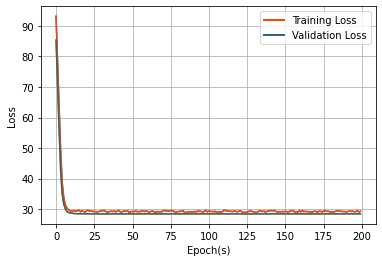

In [ ]:
#Signal_and_Rainfall
pred_model = Sequential()
pred_model.add(Dense(units = 1024, input_shape = (input_dim, input_hr), activation = 'relu'))
pred_model.add(GRU(units = 1024, input_shape = (input_dim, 1024), return_sequences = True))
pred_model.add(Dropout(0.2))
pred_model.add(GRU(units = input_hr, input_shape = (input_dim, 1024)))
pred_model.add(Dropout(0.2))
pred_model.add(Dense(output_hr, activation = 'relu'))

pred_model.summary()

epochs = 200
lr = 0.1
opt = optimizers.Adam(lr, decay=lr/epochs)

pred_model.compile(loss = 'MAPE', metrics=['accuracy'],optimizer = opt)

loss_history = LossHistory()
lrate = callbacks.LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]
history = pred_model.fit(X_train, y_train, 
   validation_data=(X_test, y_test), 
   epochs=epochs, 
   batch_size=32, 
   callbacks=callbacks_list, 
   verbose=2)

px = 2/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(533.2*px, 125*px),constrained_layout =True, dpi = 400)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.plot(train_loss, color='#FF4500')
plt.plot(val_loss, color='#326872')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#FF4500', lw=2),
                Line2D([0], [0], color='#326872', lw=2)]

lines = plt.plot()
plt.legend(custom_lines, ['Training Loss', 'Validation Loss'])

plt.grid(True)

y_pred = pred_model(X_test)

pred_model.save('/content/{}_Chikan_Tower_Mobile_and_Rainfall_200epoch_lr0.1_best_model.h5'.format(loc))

#####Mobile and Temperature Data

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 2, 1024)           50176     
                                                                 
 gru_67 (GRU)                (None, 2, 1024)           6297600   
                                                                 
 dropout_72 (Dropout)        (None, 2, 1024)           0         
                                                                 
 gru_68 (GRU)                (None, 48)                154656    
                                                                 
 dropout_73 (Dropout)        (None, 48)                0         
                                                                 
 dense_74 (Dense)            (None, 5)                 245       
                                                                 
Total params: 6,502,677
Trainable params: 6,502,677
N

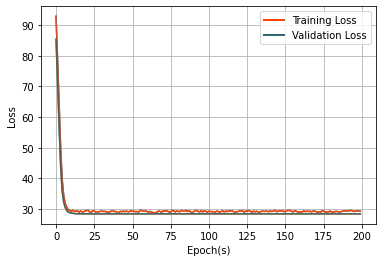

In [ ]:
#Signal_and_Temperature
pred_model = Sequential()
pred_model.add(Dense(units = 1024, input_shape = (input_dim, input_hr), activation = 'relu'))
pred_model.add(GRU(units = 1024, input_shape = (input_dim, 1024), return_sequences = True))
pred_model.add(Dropout(0.2))
pred_model.add(GRU(units = input_hr, input_shape = (input_dim, 1024)))
pred_model.add(Dropout(0.2))
pred_model.add(Dense(output_hr, activation = 'relu'))

pred_model.summary()

epochs = 200
lr = 0.1
opt = optimizers.Adam(lr, decay=lr/epochs)

pred_model.compile(loss = 'MAPE', metrics=['accuracy'],optimizer = opt)

loss_history = LossHistory()
lrate = callbacks.LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]
history = pred_model.fit(X_train, y_train, 
   validation_data=(X_test, y_test), 
   epochs=epochs, 
   batch_size=32, 
   callbacks=callbacks_list, 
   verbose=2)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.plot(train_loss, color='#FF4500')
plt.plot(val_loss, color='#326872')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#FF4500', lw=2),
                Line2D([0], [0], color='#326872', lw=2)]

lines = plt.plot()
plt.legend(custom_lines, ['Training Loss', 'Validation Loss'])

plt.grid(True)

y_pred = pred_model(X_test)

pred_model.save('/content/{}_Chikan_Tower_Mobile_and_Temperature_200epoch_lr0.1_best_model.h5'.format(loc))

#####Mobile and Ticket Data

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 2, 1024)           50176     
                                                                 
 gru_69 (GRU)                (None, 2, 1024)           6297600   
                                                                 
 dropout_74 (Dropout)        (None, 2, 1024)           0         
                                                                 
 gru_70 (GRU)                (None, 48)                154656    
                                                                 
 dropout_75 (Dropout)        (None, 48)                0         
                                                                 
 dense_76 (Dense)            (None, 5)                 245       
                                                                 
Total params: 6,502,677
Trainable params: 6,502,677
N

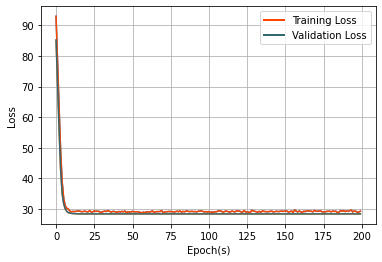

In [ ]:
#Signal_and_Ticket
pred_model = Sequential()
pred_model.add(Dense(units = 1024, input_shape = (input_dim, input_hr), activation = 'relu'))
pred_model.add(GRU(units = 1024, input_shape = (input_dim, 1024), return_sequences = True))
pred_model.add(Dropout(0.2))
pred_model.add(GRU(units = input_hr, input_shape = (input_dim, 1024)))
pred_model.add(Dropout(0.2))
pred_model.add(Dense(output_hr, activation = 'relu'))

pred_model.summary()

epochs = 200
lr = 0.1
opt = optimizers.Adam(lr, decay=lr/epochs)

pred_model.compile(loss = 'MAPE', metrics=['accuracy'],optimizer = opt)

loss_history = LossHistory()
lrate = callbacks.LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]
history = pred_model.fit(X_train, y_train, 
   validation_data=(X_test, y_test), 
   epochs=epochs, 
   batch_size=32, 
   callbacks=callbacks_list, 
   verbose=2)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.plot(train_loss, color='#FF4500')
plt.plot(val_loss, color='#326872')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#FF4500', lw=2),
                Line2D([0], [0], color='#326872', lw=2)]

lines = plt.plot()
plt.legend(custom_lines, ['Training Loss', 'Validation Loss'])

plt.grid(True)

y_pred = pred_model(X_test)

pred_model.save('/content/{}_Chikan_Tower_Mobile_and_Ticket_200epoch_lr0.1_best_model.h5'.format(loc))

#####Mobile and Holiday Data

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 2, 1024)           50176     
                                                                 
 gru_71 (GRU)                (None, 2, 1024)           6297600   
                                                                 
 dropout_76 (Dropout)        (None, 2, 1024)           0         
                                                                 
 gru_72 (GRU)                (None, 48)                154656    
                                                                 
 dropout_77 (Dropout)        (None, 48)                0         
                                                                 
 dense_78 (Dense)            (None, 5)                 245       
                                                                 
Total params: 6,502,677
Trainable params: 6,502,677
N

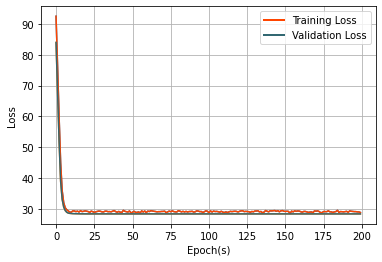

In [ ]:
#Signal and Holiday
pred_model = Sequential()
pred_model.add(Dense(units = 1024, input_shape = (input_dim, input_hr), activation = 'relu'))
pred_model.add(GRU(units = 1024, input_shape = (input_dim, 1024), return_sequences = True))
pred_model.add(Dropout(0.2))
pred_model.add(GRU(units = input_hr, input_shape = (input_dim, 1024)))
pred_model.add(Dropout(0.2))
pred_model.add(Dense(output_hr, activation = 'relu'))

pred_model.summary()

epochs = 200
lr = 0.1
opt = optimizers.Adam(lr, decay=lr/epochs)

pred_model.compile(loss = 'MAPE', metrics=['accuracy'],optimizer = opt)

loss_history = LossHistory()
lrate = callbacks.LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]
history = pred_model.fit(X_train, y_train, 
   validation_data=(X_test, y_test), 
   epochs=epochs, 
   batch_size=32, 
   callbacks=callbacks_list, 
   verbose=2)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.plot(train_loss, color='#FF4500')
plt.plot(val_loss, color='#326872')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#FF4500', lw=2),
                Line2D([0], [0], color='#326872', lw=2)]

lines = plt.plot()
plt.legend(custom_lines, ['Training Loss', 'Validation Loss'])

plt.grid(True)

y_pred = pred_model(X_test)

pred_model.save('/content/{}_Chikan_Tower_Mobile_and_Holiday_200epoch_lr0.1_best_model.h5'.format(loc))

#####Mobile and Parking Data

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 2, 1024)           50176     
                                                                 
 gru_73 (GRU)                (None, 2, 1024)           6297600   
                                                                 
 dropout_78 (Dropout)        (None, 2, 1024)           0         
                                                                 
 gru_74 (GRU)                (None, 48)                154656    
                                                                 
 dropout_79 (Dropout)        (None, 48)                0         
                                                                 
 dense_80 (Dense)            (None, 5)                 245       
                                                                 
Total params: 6,502,677
Trainable params: 6,502,677
N

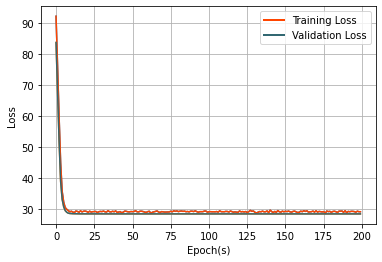

In [ ]:
#Mobile_and_Parking
pred_model = Sequential()
pred_model.add(Dense(units = 1024, input_shape = (input_dim, input_hr), activation = 'relu'))
pred_model.add(GRU(units = 1024, input_shape = (input_dim, 1024), return_sequences = True))
pred_model.add(Dropout(0.2))
pred_model.add(GRU(units = input_hr, input_shape = (input_dim, 1024)))
pred_model.add(Dropout(0.2))
pred_model.add(Dense(output_hr, activation = 'relu'))

pred_model.summary()

epochs = 200
lr = 0.1
opt = optimizers.Adam(lr, decay=lr/epochs)

pred_model.compile(loss = 'MAPE', metrics=['accuracy'],optimizer = opt)

loss_history = LossHistory()
lrate = callbacks.LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]
history = pred_model.fit(X_train, y_train, 
   validation_data=(X_test, y_test), 
   epochs=epochs, 
   batch_size=32, 
   callbacks=callbacks_list, 
   verbose=2)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.plot(train_loss, color='#FF4500')
plt.plot(val_loss, color='#326872')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#FF4500', lw=2),
                Line2D([0], [0], color='#326872', lw=2)]

lines = plt.plot()
plt.legend(custom_lines, ['Training Loss', 'Validation Loss'])

plt.grid(True)

y_pred = pred_model(X_test)

pred_model.save('/content/{}_Chikan_Tower_Mobile_and_Parking_200epoch_lr0.1_best_model.h5'.format(loc))

#####All Variables Data

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6, 1024)           50176     
                                                                 
 gru_2 (GRU)                 (None, 6, 1024)           6297600   
                                                                 
 dropout_2 (Dropout)         (None, 6, 1024)           0         
                                                                 
 gru_3 (GRU)                 (None, 48)                154656    
                                                                 
 dropout_3 (Dropout)         (None, 48)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 245       
                                                                 
Total params: 6,502,677
Trainable params: 6,502,677
No

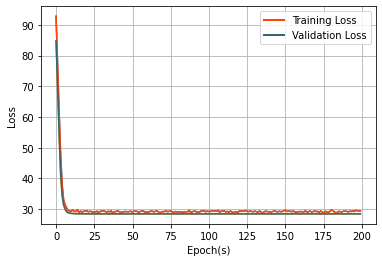

In [ ]:
#All Variables Data
pred_model = Sequential()
pred_model.add(Dense(units = 1024, input_shape = (input_dim, input_hr), activation = 'relu'))
pred_model.add(GRU(units = 1024, input_shape = (input_dim, 1024), return_sequences = True))
pred_model.add(Dropout(0.2))
pred_model.add(GRU(units = input_hr, input_shape = (input_dim, 1024)))
pred_model.add(Dropout(0.2))
pred_model.add(Dense(output_hr, activation = 'relu'))

pred_model.summary()

epochs = 200
lr = 0.1
opt = optimizers.Adam(lr, decay=lr/epochs)

pred_model.compile(loss = 'MAPE', metrics=['accuracy'],optimizer = opt)

loss_history = LossHistory()
lrate = callbacks.LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]
history = pred_model.fit(X_train, y_train, 
   validation_data=(X_test, y_test), 
   epochs=epochs, 
   batch_size=32, 
   callbacks=callbacks_list, 
   verbose=2)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.plot(train_loss, color='#FF4500')
plt.plot(val_loss, color='#326872')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#FF4500', lw=2),
                Line2D([0], [0], color='#326872', lw=2)]

lines = plt.plot()
plt.legend(custom_lines, ['Training Loss', 'Validation Loss'])

plt.grid(True)

y_pred = pred_model(X_test)

pred_model.save('/content/{}_Chikan_Tower_all_variables_200epoch_lr0.1_best_model.h5'.format(loc))

### 2.4 Experiment to Compare Different Models and Their Results.
After comparing the three time series models of LSTM, GRU, and GRU-Attention, because the difference in Loss is not large, the GRU model with the least number of parameters is used to reduce the model inference time.

In [ ]:
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

In [ ]:
def create_GRU_with_attention(hidden_units, dense_units, input_shape, activation):
    x=Input(shape=input_shape)
    GRU_layer = GRU(hidden_units, return_sequences=True, activation=activation)(x)
    attention_layer = attention()(GRU_layer)
    outputs=Dense(dense_units, trainable=True, activation=activation)(attention_layer)
    model=Model(x,outputs)
    model.compile(loss='mape', optimizer='adam')    
    return model

####LSTM

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 3, 1024)           50176     
                                                                 
 lstm_72 (LSTM)              (None, 3, 1024)           8392704   
                                                                 
 dropout_52 (Dropout)        (None, 3, 1024)           0         
                                                                 
 lstm_73 (LSTM)              (None, 48)                206016    
                                                                 
 dropout_53 (Dropout)        (None, 48)                0         
                                                                 
 dense_78 (Dense)            (None, 5)                 245       
                                                                 
Total params: 8,649,141
Trainable params: 8,649,141
N

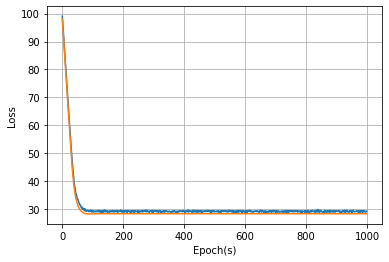

In [ ]:
#LSTM, learning rate = 0.01
pred_model = Sequential()
pred_model.add(Dense(units = 1024, input_shape = (input_dim, input_hr), activation = 'relu'))
pred_model.add(LSTM(units = 1024, input_shape = (input_dim, 1024), return_sequences = True))
pred_model.add(Dropout(0.2))
pred_model.add(LSTM(units = input_hr, input_shape = (input_dim, 1024)))
pred_model.add(Dropout(0.2))
pred_model.add(Dense(output_hr, activation = 'relu'))

pred_model.summary()

epochs = 1000
lr = 0.01
opt = optimizers.Adam(lr, decay=lr/epochs)


pred_model.compile(loss = 'MAPE', metrics=['accuracy'],optimizer = opt)
history = pred_model.fit(X_train, y_train, epochs= 1000 , batch_size = 32, validation_split = 0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.grid(True)

y_pred = pred_model(X_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2, 1024)           50176     
                                                                 
 lstm (LSTM)                 (None, 2, 1024)           8392704   
                                                                 
 dropout (Dropout)           (None, 2, 1024)           0         
                                                                 
 lstm_1 (LSTM)               (None, 48)                206016    
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 245       
                                                                 
Total params: 8,649,141
Trainable params: 8,649,141
Non-

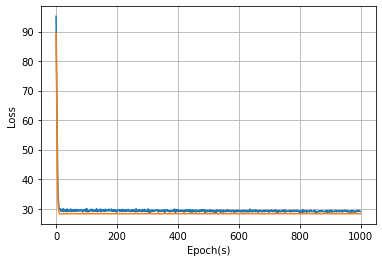

In [ ]:
#LSTM, learning rate = 0.1

pred_model = Sequential()
pred_model.add(Dense(units = 1024, input_shape = (input_dim, input_hr), activation = 'relu'))
pred_model.add(LSTM(units = 1024, input_shape = (input_dim, 1024), return_sequences = True))
pred_model.add(Dropout(0.2))
pred_model.add(LSTM(units = input_hr, input_shape = (input_dim, 1024)))
pred_model.add(Dropout(0.2))
pred_model.add(Dense(output_hr, activation = 'relu'))

pred_model.summary()

optimizer = optimizers.Adam(0.1)

pred_model.compile(loss = 'MAPE', metrics=['accuracy'],optimizer = optimizer)
history = pred_model.fit(X_train, y_train, epochs = 1000, batch_size = 32, validation_split = 0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.grid(True)

y_pred = pred_model(X_test)

In [ ]:
pred_model(X_train)

<tf.Tensor: shape=(1291, 5), dtype=float32, numpy=
array([[ 966.5559 ,  963.59564,  962.9593 ,  945.7283 ,  911.1408 ],
       [1116.9968 , 1118.1411 , 1117.1365 , 1097.0559 , 1057.0961 ],
       [1125.2255 , 1126.6049 , 1125.5742 , 1105.3536 , 1065.1222 ],
       ...,
       [ 996.904  ,  994.5133 ,  993.74023,  975.7067 ,  939.5491 ],
       [ 840.979  ,  834.9643 ,  834.33624,  819.5295 ,  789.7898 ],
       [1124.8716 , 1126.2399 , 1125.2115 , 1104.9958 , 1064.7754 ]],
      dtype=float32)>

In [ ]:
y_train

array([[ 882.57712965,  965.62049422, 1013.27445914, 1181.40363268,
        1413.85572653],
       [1564.69785278, 1475.804578  , 1524.24763238, 1410.68834199,
        1404.9781522 ],
       [1445.01732552, 1602.26107881, 1576.01692121, 1428.7224773 ,
        1345.11236104],
       ...,
       [1187.94655217,  920.16516683,  990.55769316, 1065.04096771,
        1027.57428572],
       [ 677.87474662,  821.77653765, 1085.92053828, 1120.10760923,
        1069.69641938],
       [1591.17576796, 1666.03747675, 1491.79884999, 1415.19222458,
        1316.46214239]])

####GRU

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 3, 1024)           50176     
                                                                 
 gru_4 (GRU)                 (None, 3, 1024)           6297600   
                                                                 
 dropout_60 (Dropout)        (None, 3, 1024)           0         
                                                                 
 gru_5 (GRU)                 (None, 48)                154656    
                                                                 
 dropout_61 (Dropout)        (None, 48)                0         
                                                                 
 dense_87 (Dense)            (None, 5)                 245       
                                                                 
Total params: 6,502,677
Trainable params: 6,502,677
N

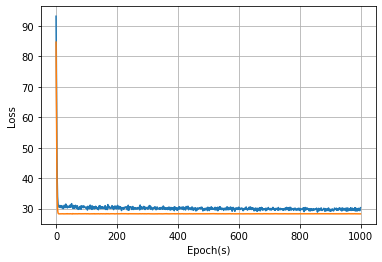

In [ ]:
#GRU,Dropout = 0.5
pred_model = Sequential()
pred_model.add(Dense(units = 1024, input_shape = (input_dim, input_hr), activation = 'relu'))
pred_model.add(GRU(units = 1024, input_shape = (input_dim, 1024), return_sequences = True))
pred_model.add(Dropout(0.5))
pred_model.add(GRU(units = input_hr, input_shape = (input_dim, 1024)))
pred_model.add(Dropout(0.5))
pred_model.add(Dense(output_hr, activation = 'relu'))

pred_model.summary()

epochs = 1000
lr = 0.1
opt = optimizers.Adam(lr, decay=lr/epochs)


pred_model.compile(loss = 'MAPE', metrics=['accuracy'],optimizer = opt)
history = pred_model.fit(X_train, y_train, epochs= 1000 , batch_size = 32, validation_split = 0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.grid(True)

y_pred = pred_model(X_test)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 3, 1024)           50176     
                                                                 
 gru_2 (GRU)                 (None, 3, 1024)           6297600   
                                                                 
 dropout_58 (Dropout)        (None, 3, 1024)           0         
                                                                 
 gru_3 (GRU)                 (None, 48)                154656    
                                                                 
 dropout_59 (Dropout)        (None, 48)                0         
                                                                 
 dense_85 (Dense)            (None, 5)                 245       
                                                                 
Total params: 6,502,677
Trainable params: 6,502,677
N

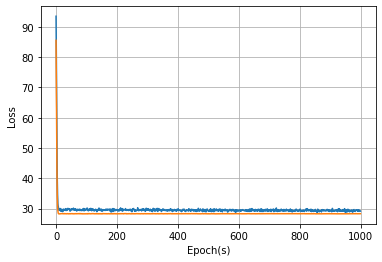

In [ ]:
#GRU,Dropout = 0.3

pred_model = Sequential()
pred_model.add(Dense(units = 1024, input_shape = (input_dim, input_hr), activation = 'relu'))
pred_model.add(GRU(units = 1024, input_shape = (input_dim, 1024), return_sequences = True))
pred_model.add(Dropout(0.3))
pred_model.add(GRU(units = input_hr, input_shape = (input_dim, 1024)))
pred_model.add(Dropout(0.3))
pred_model.add(Dense(output_hr, activation = 'relu'))

pred_model.summary()

epochs = 1000
lr = 0.1
opt = optimizers.Adam(lr, decay=lr/epochs)


pred_model.compile(loss = 'MAPE', metrics=['accuracy'],optimizer = opt)
history = pred_model.fit(X_train, y_train, epochs= 1000 , batch_size = 32, validation_split = 0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.grid(True)

y_pred = pred_model(X_test)

####GRU-Attention

Epoch 1/1000
33/33 [==============================] - 4s 32ms/step - loss: 93.9976 - accuracy: 0.1667 - val_loss: 86.6846 - val_accuracy: 0.2664
Epoch 2/1000
33/33 [==============================] - 0s 10ms/step - loss: 80.7649 - accuracy: 0.1657 - val_loss: 73.0680 - val_accuracy: 0.0579
Epoch 3/1000
33/33 [==============================] - 0s 12ms/step - loss: 67.6175 - accuracy: 0.1676 - val_loss: 59.5443 - val_accuracy: 0.0579
Epoch 4/1000
33/33 [==============================] - 0s 12ms/step - loss: 54.7775 - accuracy: 0.1560 - val_loss: 46.5973 - val_accuracy: 0.0579
Epoch 5/1000
33/33 [==============================] - 0s 12ms/step - loss: 43.8721 - accuracy: 0.1502 - val_loss: 37.3046 - val_accuracy: 0.2664
Epoch 6/1000
33/33 [==============================] - 0s 12ms/step - loss: 37.2010 - accuracy: 0.1831 - val_loss: 32.4909 - val_accuracy: 0.0579
Epoch 7/1000
33/33 [==============================] - 0s 12ms/step - loss: 34.0394 - accuracy: 0.1560 - val_loss: 30.2232 - val_ac

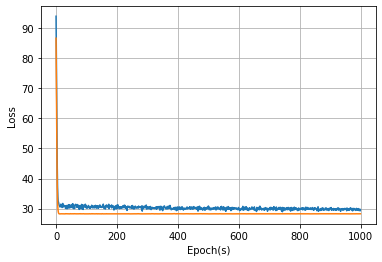

In [ ]:
#GRU-Attention
pred_model = Sequential()

dense_units = 1024

pred_model.add(Dense(units = 1024, input_shape = (input_dim, input_hr), activation = 'relu'))
pred_model.add(GRU(units = 1024, input_shape = (input_dim, 1024), return_sequences = True))
pred_model.add(Dropout(0.5))
pred_model.add(GRU(units = input_hr, input_shape = (input_dim, 1024)))
pred_model.add(Dropout(0.5))
pred_model.add(Dense(output_hr, activation = 'relu'))

x=Input(shape=(input_dim, 1024))
GRU_layer = GRU(dense_units, return_sequences=True, activation='relu')(x)
attention_layer = attention()(GRU_layer)
outputs=Dense(dense_units, trainable=True, activation='relu')(attention_layer)
model=Model(x,outputs)


epochs = 1000
lr = 0.1
opt = optimizers.Adam(lr, decay=lr/epochs)

pred_model.summary()

pred_model.compile(loss = 'MAPE', metrics=['accuracy'],optimizer = opt)
history = pred_model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split = 0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.grid(True)

y_pred = pred_model(X_test)

### 2.5 Load the Best Model, and Visualization.

####Visualize the Predictive Result
Take All Variables Data as Example

##### Chikan Tower (赤崁園區)

In [ ]:
import tensorflow as tf

In [ ]:
#Load the best model
loaded_model = tf.keras.models.load_model('/content/{}_Chikan_Tower_all_variables_200epoch_lr0.1_best_model.h5'.format(loc))

In [ ]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6, 1024)           50176     
                                                                 
 gru_2 (GRU)                 (None, 6, 1024)           6297600   
                                                                 
 dropout_2 (Dropout)         (None, 6, 1024)           0         
                                                                 
 gru_3 (GRU)                 (None, 48)                154656    
                                                                 
 dropout_3 (Dropout)         (None, 48)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 245       
                                                                 
Total params: 6,502,677
Trainable params: 6,502,677
No

In [ ]:
y_pred_cmp = loaded_model(X_test)
y_pred_cmp[0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([833.14355, 831.3831 , 828.2043 , 824.835  , 823.5711 ],
      dtype=float32)>

In [ ]:
import pandas as pd
loc = '赤崁園區'#赤崁園區,港濱軸帶,安平老街,國華海安商圈,孔廟文化園區

min_df = pd.read_excel("遊客分時信令.xlsx", sheet_name = "data sample")
min_df = min_df[min_df['attraction'] == loc]
min_df['dt_date'] = pd.to_datetime(min_df['dt_date'])
min_df.sort_values(by = ['dt_date', 'dt_hour'], inplace = True)
min_df.reset_index(drop = True, inplace = True)
display(min_df)
num_arr = min_df['num']
num_arr = num_arr.to_list()

,attraction,dt_date,dt_hour,sub_category,num
0,赤崁園區,2022-07-01,0,平日,647.052772
1,赤崁園區,2022-07-01,1,平日,588.132806
2,赤崁園區,2022-07-01,2,平日,563.186899
3,赤崁園區,2022-07-01,3,平日,517.544045
4,赤崁園區,2022-07-01,4,平日,423.445480
...,...,...,...,...,...
1483,赤崁園區,2022-08-31,19,平日,1087.619049
1484,赤崁園區,2022-08-31,20,平日,1043.496373
1485,赤崁園區,2022-08-31,21,平日,936.167965
1486,赤崁園區,2022-08-31,22,平日,879.892222


In [ ]:
#Create a column called "date_hour"
min_df = pd.concat([min_df,pd.DataFrame(columns=list('a'))])
transform_dict = { 
                  "a":"date_hour"
                  }
min_df.rename(columns = transform_dict, inplace = True)
min_df.head()

,attraction,dt_date,dt_hour,sub_category,num,date_hour
0,赤崁園區,2022-07-01,0.0,平日,647.052772,NaN
1,赤崁園區,2022-07-01,1.0,平日,588.132806,NaN
2,赤崁園區,2022-07-01,2.0,平日,563.186899,NaN
3,赤崁園區,2022-07-01,3.0,平日,517.544045,NaN
4,赤崁園區,2022-07-01,4.0,平日,423.445480,NaN


In [ ]:
from datetime import datetime, timedelta

In [ ]:
initial = np.datetime64('2022-07-01 00:00')

In [ ]:
#Fill date and time into "date_hour"
for i in range(len(min_df)):
  every_hour = initial + np.timedelta64(i,'h')
  min_df['date_hour'][i]= every_hour

<ipython-input-424-6653f5d35d28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_df['date_hour'][i]= every_hour


In [ ]:
min_df['date_hour']

0       2022-07-01T00:00
1       2022-07-01T01:00
2       2022-07-01T02:00
3       2022-07-01T03:00
4       2022-07-01T04:00
              ...       
1483    2022-08-31T19:00
1484    2022-08-31T20:00
1485    2022-08-31T21:00
1486    2022-08-31T22:00
1487    2022-08-31T23:00
Name: date_hour, Length: 1488, dtype: object

In [ ]:
#Create the rows in the next 5 hours of "date_hour"

n = output_hr
new_index = pd.RangeIndex(n)
na_df = pd.DataFrame(np.nan,index=new_index,columns=min_df.columns)
new_df = pd.concat([min_df,na_df],axis=0)
new_df.reset_index(drop = True, inplace = True)
display(new_df)
new_df_arr = new_df['num']
new_df_arr = new_df_arr.to_list()

,attraction,dt_date,dt_hour,sub_category,num,date_hour
0,赤崁園區,2022-07-01,0.0,平日,647.052772,2022-07-01T00:00
1,赤崁園區,2022-07-01,1.0,平日,588.132806,2022-07-01T01:00
2,赤崁園區,2022-07-01,2.0,平日,563.186899,2022-07-01T02:00
3,赤崁園區,2022-07-01,3.0,平日,517.544045,2022-07-01T03:00
4,赤崁園區,2022-07-01,4.0,平日,423.445480,2022-07-01T04:00
...,...,...,...,...,...,...
1488,NaN,NaT,NaN,NaN,NaN,NaN
1489,NaN,NaT,NaN,NaN,NaN,NaN
1490,NaN,NaT,NaN,NaN,NaN,NaN
1491,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
#Fill date and time into the next 5 hours of "date_hour"

for m in range(output_hr):
    new_df['num'][len(min_df)+m] = y_pred_cmp[0][m]
    new_num_arr = new_df['num']
    new_num_arr = new_num_arr.to_list()

<ipython-input-427-5c1aa0fee564>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['num'][len(min_df)+m] = y_pred_cmp[0][m]


In [ ]:
min_df['date_hour']

0       2022-07-01T00:00
1       2022-07-01T01:00
2       2022-07-01T02:00
3       2022-07-01T03:00
4       2022-07-01T04:00
              ...       
1483    2022-08-31T19:00
1484    2022-08-31T20:00
1485    2022-08-31T21:00
1486    2022-08-31T22:00
1487    2022-08-31T23:00
Name: date_hour, Length: 1488, dtype: object

In [ ]:
for j in range(n):
  future_5hour = new_df['date_hour'] [len(min_df)+j-1]+ np.timedelta64(1,'h')
  new_df['date_hour'][len(min_df)+j]=future_5hour

<ipython-input-429-d7afb0333d08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date_hour'][len(min_df)+j]=future_5hour


In [ ]:
new_df

,attraction,dt_date,dt_hour,sub_category,num,date_hour
0,赤崁園區,2022-07-01,0.0,平日,647.052772,2022-07-01T00:00
1,赤崁園區,2022-07-01,1.0,平日,588.132806,2022-07-01T01:00
2,赤崁園區,2022-07-01,2.0,平日,563.186899,2022-07-01T02:00
3,赤崁園區,2022-07-01,3.0,平日,517.544045,2022-07-01T03:00
4,赤崁園區,2022-07-01,4.0,平日,423.445480,2022-07-01T04:00
...,...,...,...,...,...,...
1488,NaN,NaT,NaN,NaN,833.143555,2022-09-01T00:00
1489,NaN,NaT,NaN,NaN,831.383118,2022-09-01T01:00
1490,NaN,NaT,NaN,NaN,828.204285,2022-09-01T02:00
1491,NaN,NaT,NaN,NaN,824.835022,2022-09-01T03:00


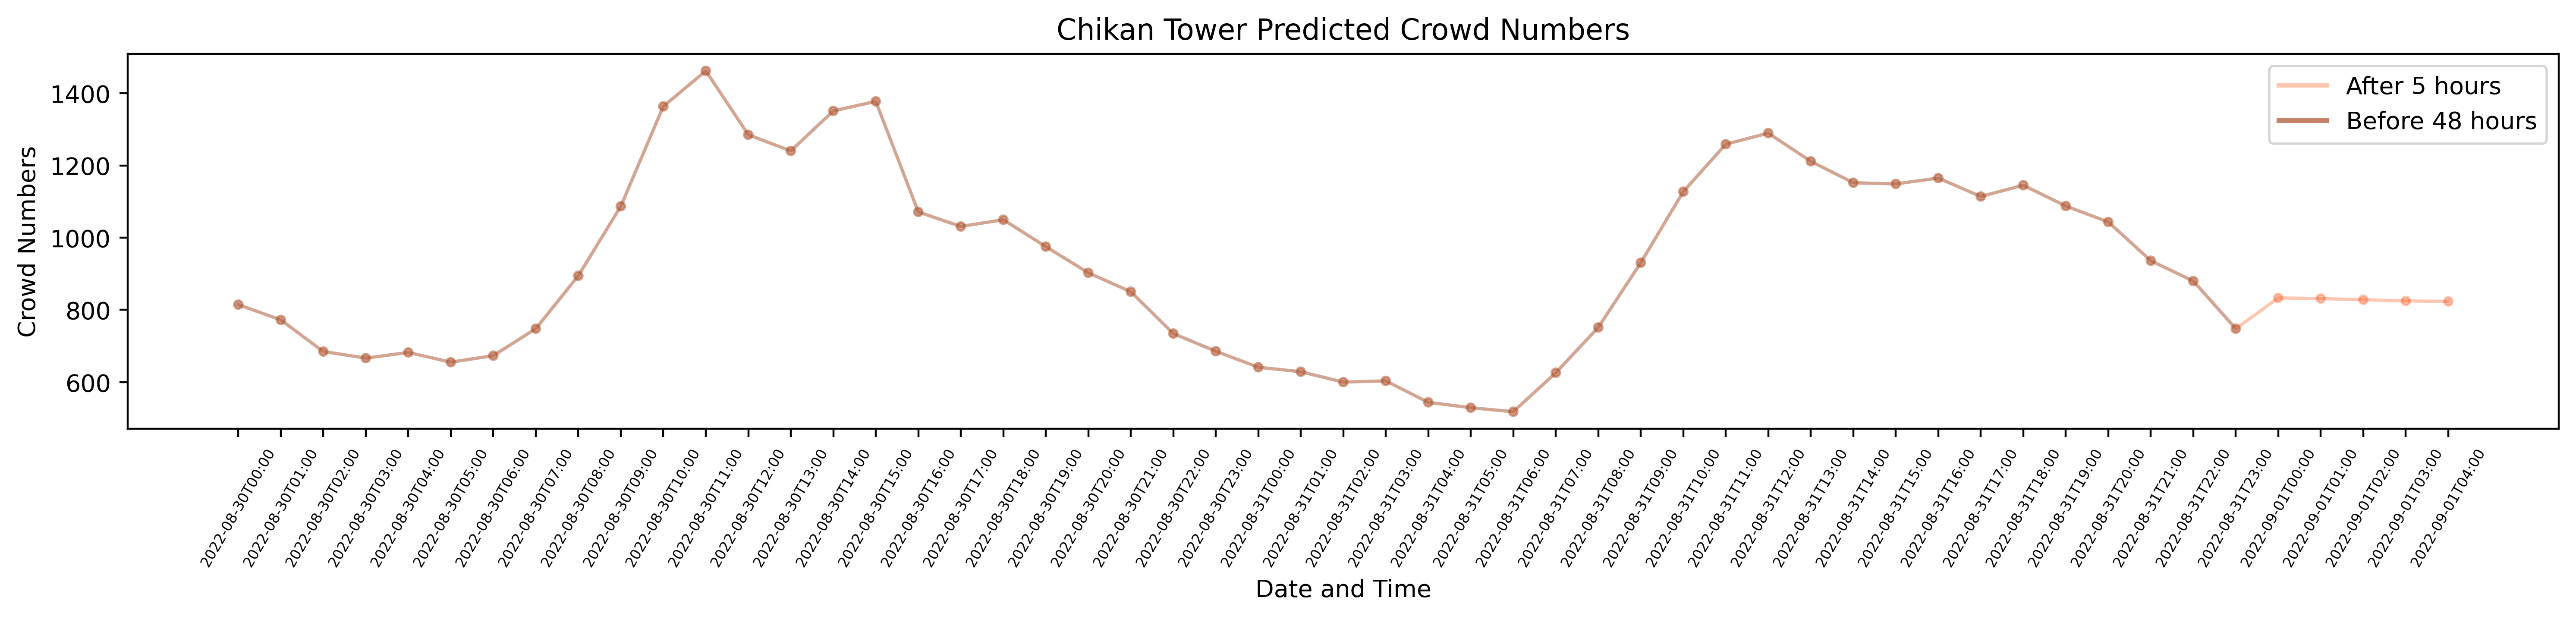

In [ ]:
#Visualize the Predictive Data
import seaborn  as sns

px = 2/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(533.2*px, 125*px),constrained_layout =True, dpi = 400)

sns.pointplot(x="date_hour", y="num", data=new_df[(len(min_df)-input_hr):len(min_df)], color="#326872",scale = 0.5)
g = sns.pointplot(x="date_hour", y="num", data=new_df[(len(min_df)-input_hr):len(new_df)], color="#FF4500",scale = 0.5,plot_kws=dict(alpha=0.3))
plt.setp(g.collections, alpha=.3) #for the markers
plt.setp(g.lines, alpha=.3)       #for the lines


plt.title('Chikan Tower Predicted Crowd Numbers')
plt.xlabel('Date and Time')
plt.ylabel('Crowd Numbers')
plt.xticks(size=6, rotation=60)


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#FF4500', lw=2, alpha = 0.3),
                Line2D([0], [0], color='#c48368', lw=2)]

lines = plt.plot()
plt.legend(custom_lines, ['After 5 hours', 'Before 48 hours'])

####Visualize the Historical Data
Take All Variables Data as Example

##### Chikan Tower (赤崁園區)

In [ ]:
# Import module
import pandas as pd
loc = '赤崁園區'#赤崁園區,港濱軸帶,安平老街,國華海安商圈,孔廟文化園區

min_df = pd.read_excel("遊客分時信令.xlsx", sheet_name = "data sample")
min_df = min_df[min_df['attraction'] == loc]
min_df['dt_date'] = pd.to_datetime(min_df['dt_date'])
min_df.sort_values(by = ['dt_date', 'dt_hour'], inplace = True)
min_df.reset_index(drop = True, inplace = True)
display(min_df)
num_arr = min_df['num']
num_arr = num_arr.to_list()

,attraction,dt_date,dt_hour,sub_category,num
0,赤崁園區,2022-07-01,0,平日,647.052772
1,赤崁園區,2022-07-01,1,平日,588.132806
2,赤崁園區,2022-07-01,2,平日,563.186899
3,赤崁園區,2022-07-01,3,平日,517.544045
4,赤崁園區,2022-07-01,4,平日,423.445480
...,...,...,...,...,...
1483,赤崁園區,2022-08-31,19,平日,1087.619049
1484,赤崁園區,2022-08-31,20,平日,1043.496373
1485,赤崁園區,2022-08-31,21,平日,936.167965
1486,赤崁園區,2022-08-31,22,平日,879.892222


In [ ]:
min_df = pd.concat([min_df,pd.DataFrame(columns=list('a'))])
transform_dict = { 
                  "a":"date_hour"
                  }
min_df.rename(columns = transform_dict, inplace = True)
min_df.head()

,attraction,dt_date,dt_hour,sub_category,num,date_hour
0,赤崁園區,2022-07-01,0.0,平日,647.052772,NaN
1,赤崁園區,2022-07-01,1.0,平日,588.132806,NaN
2,赤崁園區,2022-07-01,2.0,平日,563.186899,NaN
3,赤崁園區,2022-07-01,3.0,平日,517.544045,NaN
4,赤崁園區,2022-07-01,4.0,平日,423.445480,NaN


In [ ]:
#Chage the data type into hourly format on each date
from datetime import datetime, timedelta

initial = np.datetime64('2022-07-01 00:00')

for i in range(len(min_df)):
  every_hour = initial + np.timedelta64(i,'h')
  min_df['date_hour'][i]= every_hour

n = output_hr
new_index = pd.RangeIndex(n)
na_df = pd.DataFrame(np.nan,index=new_index,columns=min_df.columns)
new_df = pd.concat([min_df,na_df],axis=0)
new_df.reset_index(drop = True, inplace = True)
display(new_df)
new_df_arr = new_df['num']
new_df_arr = new_df_arr.to_list()

for m in range(output_hr):
    new_df['num'][len(min_df)+m] = y_pred_cmp[0][m]
    new_num_arr = new_df['num']
    new_num_arr = new_num_arr.to_list()

min_df['date_hour']

<ipython-input-165-dcbfc40b6819>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_df['date_hour'][i]= every_hour


,attraction,dt_date,dt_hour,sub_category,num,date_hour
0,赤崁園區,2022-07-01,0.0,平日,647.052772,2022-07-01T00:00
1,赤崁園區,2022-07-01,1.0,平日,588.132806,2022-07-01T01:00
2,赤崁園區,2022-07-01,2.0,平日,563.186899,2022-07-01T02:00
3,赤崁園區,2022-07-01,3.0,平日,517.544045,2022-07-01T03:00
4,赤崁園區,2022-07-01,4.0,平日,423.445480,2022-07-01T04:00
...,...,...,...,...,...,...
1488,NaN,NaT,NaN,NaN,NaN,NaN
1489,NaN,NaT,NaN,NaN,NaN,NaN
1490,NaN,NaT,NaN,NaN,NaN,NaN
1491,NaN,NaT,NaN,NaN,NaN,NaN


<ipython-input-165-dcbfc40b6819>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['num'][len(min_df)+m] = y_pred_cmp[0][m]


0       2022-07-01T00:00
1       2022-07-01T01:00
2       2022-07-01T02:00
3       2022-07-01T03:00
4       2022-07-01T04:00
              ...       
1483    2022-08-31T19:00
1484    2022-08-31T20:00
1485    2022-08-31T21:00
1486    2022-08-31T22:00
1487    2022-08-31T23:00
Name: date_hour, Length: 1488, dtype: object

In [ ]:
#Take 12A.M. on Initial Date
h = 12
initial_date = '2022-07-01'
initial_date_filter = min_df[min_df['dt_date'] == initial_date][h:h+1].index[0] #12A.M.
min_df.loc[initial_date_filter]

attraction                     赤崁園區
dt_date         2022-07-01 00:00:00
dt_hour                        12.0
sub_category                     平日
num                     1253.417593
date_hour          2022-07-01T12:00
Name: 12, dtype: object

In [ ]:
initial_date

'2022-07-01'

In [ ]:
initial_date_filter

12

In [ ]:
#Take 12A.M. on End Date

h = 12
end_date = '2022-08-31'
end_date_filter = min_df[min_df['dt_date'] == end_date][h:h+1].index[0] #12A.M.
min_df.loc[end_date_filter]

attraction                     赤崁園區
dt_date         2022-08-31 00:00:00
dt_hour                        12.0
sub_category                     平日
num                     1289.414186
date_hour          2022-08-31T12:00
Name: 1476, dtype: object

In [ ]:
end_date_filter #12A.M.

1476

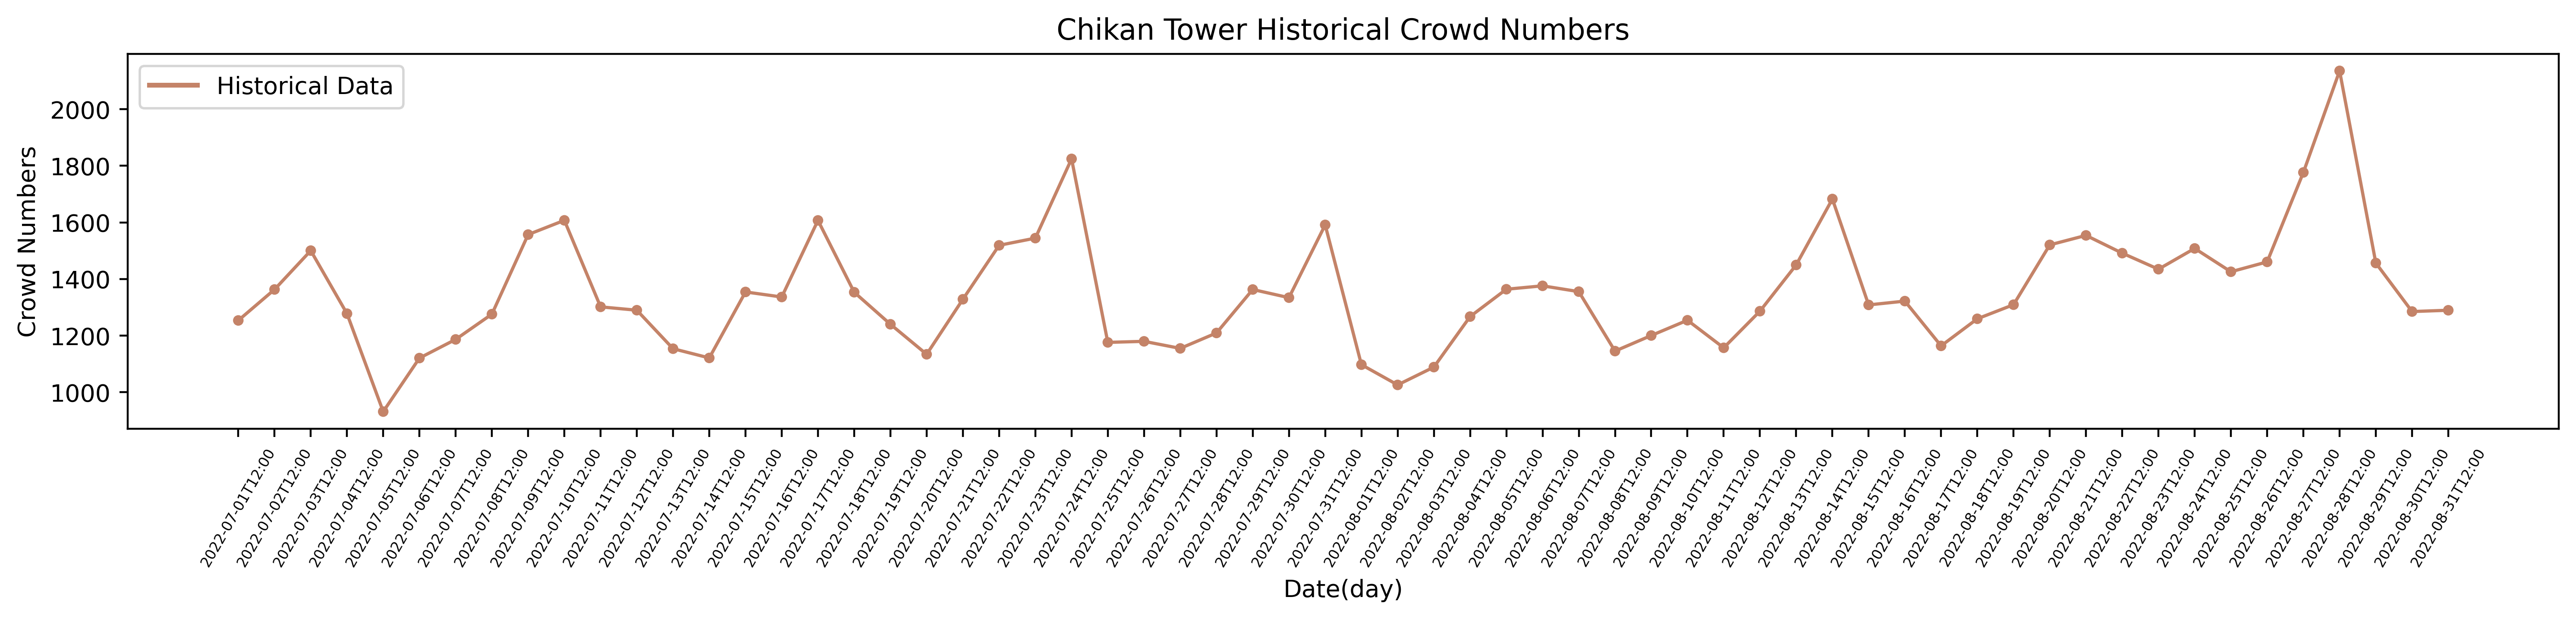

In [ ]:
#Visualize the Historical Data
import seaborn  as sns

px = 2/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(533.2*px, 125*px),constrained_layout =True, dpi = 400)

sns.pointplot(x="date_hour", y="num", data=min_df[initial_date_filter:end_date_filter+1:24], color ="#c48368",scale = 0.5)

plt.title('Chikan Tower Historical Crowd Numbers')
plt.xlabel('Date(day)')
plt.ylabel('Crowd Numbers')
plt.xticks(size=6, rotation=60)


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#c48368', lw=2)]

lines = plt.plot()
plt.legend(custom_lines, ['Historical Data'])